2 0.4640032345861307
3 0.5728192931229565
4 0.6651184947758352
5 0.6982088069154125
6 0.7221835699086505
7 0.7389904083708875
8 0.7482845404559911
9 0.7542998823684682
10 0.7614625724710361
11 0.7646045266274103
12 0.7650854354803738
13 0.7645710488985237
14 0.7729457207672463
15 0.7774361664000471
16 0.7813517490647806
17 0.786491243470169
18 0.7885213012815435
19 0.7872455455846172
20 0.7906336857972927
21 0.7897646829399013
22 0.7888993822343859
23 0.7912115418713612
24 0.7903784925143242
25 0.7906936312867913
26 0.7942811453647461
27 0.7921615822539324
28 0.784905103279101
29 0.7919159153600733
30 0.7869701758712602
31 0.7902843643162267
32 0.7863700518945776
33 0.7863582277074195
34 0.787273697083672
35 0.7891930631086008
36 0.792531732933703
37 0.7923812568244424
38 0.7905600498571445
39 0.795027600401994
40 0.7921112842249335
41 0.7903594884041514
42 0.7970590640626771
43 0.7922172716826463
44 0.797912763514441
45 0.7929105444484712
46 0.7960363790863985
47 0.7951108536044696
48

'"\nBaggingClassifier\no\nAdaBoostClassifier\n\nbagging riduce varianza\nboosting riduce Bias\n\nControllare inoltre overfitting underfitting in base al numero di stimatori usati / numero massimo di foglie ecc ecc\n\nRandomForestClassifier\nteoricmanete usa bagging e boosting in automatico rispetto al decision tree\nC\'e anche random forest regressor (foglio 8)\'\n'

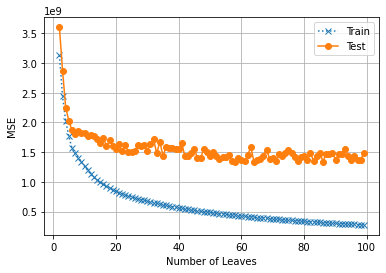

In [49]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
X_train = pd.read_csv('x_train_preprocessed.csv')
X_test = pd.read_csv('x_test_preprocessed.csv')
y_train = pd.read_csv('y_train_preprocessed.csv')
y_test = pd.read_csv('y_test_preprocessed.csv')



for max_leaves in range(2,100):
    # train and predict
    dt_model = DecisionTreeRegressor(max_leaf_nodes=max_leaves)
    #Posso anche modificare max depth
    dt_model.fit(X_train,y_train)
    # compute Accuracy
    print(max_leaves,dt_model.score(X_test,y_test))

#Notiamo che il modello da un output migliore quando utilizziamo il parametro
# max_leaves a 59
#Inoltre notiamo che raggiunge diciamo un valore medio di 0.75utilizzando parametro 10 come massimo
X_train.drop(columns=['Neighborhood_Score'], inplace=True)
X_test.drop(columns=['Neighborhood_Score'], inplace=True)


dt_try = DecisionTreeRegressor()

errors = []
for max_leaves in range(2,100):
    # train and predict
    dt_model = DecisionTreeRegressor(max_leaf_nodes=max_leaves)
    #Posso anche modificare max depth
    dt_model.fit(X_train,y_train)
    # compute Accuracy
    print(max_leaves,dt_model.score(X_test,y_test))

    train_acc = mean_squared_error(y_true=y_train, y_pred=dt_model.predict(X_train))
    test_acc  = mean_squared_error(y_true=y_test,  y_pred=dt_model.predict(X_test))

    errors += [ [max_leaves, train_acc, test_acc] ]

errors = np.array(errors)

fig, ax = plt.subplots()
ax.plot(errors[:,0], errors[:,1], "x:", label="Train")
ax.plot(errors[:,0], errors[:,2], "o-", label="Test")
ax.set_ylabel("MSE")
ax.set_xlabel("Number of Leaves")
ax.grid()
ax.legend();

#Possiamo notare come la rimozione della feature Neighborhood score va a diminuire la precisione dell'algoritmo che inoltre deve andare "piu in profondità per migliorare"




## What do we need to build an Ensemble ?
""""
BaggingClassifier
o
AdaBoostClassifier

bagging riduce varianza
boosting riduce Bias

Controllare inoltre overfitting underfitting in base al numero di stimatori usati / numero massimo di foglie ecc ecc

RandomForestClassifier
teoricmanete usa bagging e boosting in automatico rispetto al decision tree
C'e anche random forest regressor (foglio 8)'
"""

In [50]:
from sklearn.model_selection import GridSearchCV
parameters={"splitter":["best","random"],
            "max_depth" : [None,1,3,5,7,9,11,12],
            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
            "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
            "max_features":['auto','log2','sqrt',None],
            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

# calculating different regression metrics
reg_decision_model=DecisionTreeRegressor()
reg_decision_model.fit(X_train,y_train)

tuning_model=GridSearchCV(
reg_decision_model,param_grid=parameters,
    scoring='r2'
    ,cv=5,
    verbose=2,n_jobs= -1)
# function for calculating how much time take for hyperparameter tuning

tuning_model.fit(X_train,y_train)
print(tuning_model.best_params_)
print(tuning_model.best_score_)






Fitting 5 folds for each of 64000 candidates, totalling 320000 fits


C:\Users\ricca\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
128000 fits failed out of a total of 320000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
128000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ricca\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ricca\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Users\ricca\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_f

{'max_depth': 12, 'max_features': None, 'max_leaf_nodes': 50, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}
0.8142725089846798


C:\Users\ricca\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.72971795 0.7335779  0.68039858 ...        nan        nan        nan]
  warnings.warn(


In [51]:

dt = DecisionTreeRegressor(max_depth = None, min_samples_leaf = 1, min_weight_fraction_leaf = 0.1,
splitter='best',max_features= 'auto',max_leaf_nodes= None,
                           )
dt.fit(X_train,y_train)
print(dt.score(X_test,y_test))
print(dt.get_params())

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
print(dt.score(X_test,y_test))
print(dt.get_params())
"""""
path = dt.cost_complexity_pruning_path(X_train, y_train)








ccp_alphas, impurities = path.ccp_alphas, path.impurities

ccp_alphas = ccp_alphas[:-1]
print(len(ccp_alphas))
dts = []
for i,ccp_alpha in enumerate(ccp_alphas):
    dt = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    dts.append(dt)
    print(i)



node_counts = [dt.tree_.node_count for dt in dts]
depth = [dt.tree_.max_depth for dt in dts]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()
train_scores = [dt.score(X_train, y_train) for dt in dts]
test_scores = [dt.score(X_test, y_test) for dt in dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()
"""
""""
Let’s say you have hundreds of features, then “best” splitter would be ideal because it will calculate the best features to split based on the impurity measure and use that to split the nodes, whereas if you choose “random” you have a high chance of ending up with features that don’t really give you that much information, which would lead to a more deeper less precise tree.
"""

0.6454034866924108
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1, 'random_state': None, 'splitter': 'best'}
0.7630374725952982
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


'"\nLet’s say you have hundreds of features, then “best” splitter would be ideal because it will calculate the best features to split based on the impurity measure and use that to split the nodes, whereas if you choose “random” you have a high chance of ending up with features that don’t really give you that much information, which would lead to a more deeper less precise tree.\n'